In [2]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import data
os.chdir("C:\\Users\\vlade\\Documents\\Python Scripts\\Kaggle\\Santander")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# Drop ID column and define target variable
id_col = train["ID"]
target = train["target"]
train.drop(["ID", "target"], axis = 1, inplace = True)
test.drop("ID", axis = 1, inplace = True)

In [5]:
# Taking a look at some of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4991 entries, 48df886f9 to 9fc776466
dtypes: float64(1844), int64(3147)
memory usage: 169.8 MB


In [6]:
train.describe()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,1.552158e+05,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,1.587815e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,6.000000e+07,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [7]:
train.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


Step 2) Cleaning the data

In [8]:
# Look for NaNs
for i in train.isnull().any():
    if i == True:
        print (i + " contains null")

In [9]:
# Data contains no nulls so we move on

In [10]:
# We have almost as many columns as we do rows, some columns may not be unique - lets check this
print(train.shape)

cols = train.columns
cols_rem = []

for i in range(len(cols) - 1):
    v = train[cols[i]].values
    for j in range(i + 1, len(cols)):
        if np.array_equal(v, train[cols[j]].values):
            cols_rem.append(cols[j])

train.drop(cols_rem, axis = 1, inplace = True)
print(train.shape)

(4459, 4991)
(4459, 4731)


In [11]:
# As we can see from above, the data contains many zeros - interesting to see how much of a % these zeros actually take up
count_z = ((train==0).sum()/((train==0).count())*100).sort_values(ascending=False)
count_z = pd.DataFrame(count_z)
count_z.head(20)

,0
d5308d8bc,100.000000
0c8e0cd38,99.977573
556331be8,99.977573
e9235250f,99.977573
e679b8085,99.977573
bfde2aa61,99.977573
4fcb73cb1,99.977573
7497a6bc9,99.977573
bacadce94,99.977573
3ad3d521e,99.977573


In [12]:
# Take columns which have less than 100% zeros
cols_used = count_z[count_z[0] < 100]
train = train[cols_used.index]

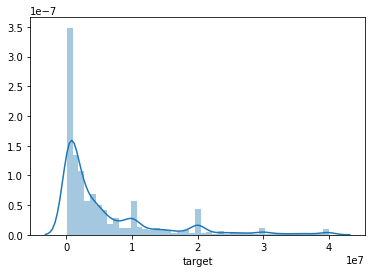

In [13]:
# Taking a look at the distribution - its also very skewed to the right
sns.distplot(target)

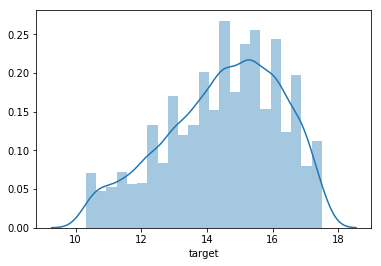

In [14]:
# Taking the logarithm seems to fix this
sns.distplot(np.log1p(1 + target))
target = np.log1p(1 + target)

Step 3) Variable choice
Here I will be taking two different approaches to feature selection: Random forest classifiers and PCA

In [15]:
# Define a model evaluation function
def eval_perf(model, X, y):
    y_pred = model.predict(X)
    rmsle = np.sqrt(np.square(np.log(y_pred-1)-np.log(y-1)).mean())
    print(f"RMSLE is {rmsle}" )

In [16]:
# Feature selection using random forests
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.30, random_state = 47)
model = RandomForestRegressor(n_jobs = -1, random_state = 16)
model.fit(X_train, y_train)
top_feat = pd.Series(model.feature_importances_, index = X_train.columns)
top_feat = top_feat.nlargest(1000)

X_train_frst =  X_train[top_feat.index]
X_test_frst = X_test[top_feat.index]

In [17]:
# PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_pca = scaler.transform(X_train)
X_test_pca = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train_pca)

X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

f"PCA chose {pca.n_components_} parameters"

'PCA chose 1202 parameters'

Step 4) Begin fitting some models

In [ ]:
# Random forest regression - fine tuning hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def Random_search(pred, tgt):
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    max_features = ["auto", "sqrt"]
    max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]

    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    rf = RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
    rf_random.fit(pred, tgt)
    return rf_random.best_params_

search_forest = Random_search(X_train_frst, y_train)
search_pca = Random_search(X_train_pca, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 78.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 206.3min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
# Grid search using random search parameter ranges
def Grid_search(rnd_search, X, y):
    
    # Param grid variables
    max_depth = [range(rnd_search["max_depth"] - 10, rnd_search["max_depth"] + 20, 10)]
    max_features = [range(rnd_search["max_features"], rnd_search["max_features"] + 1, 1)]
    min_samples_leaf = [range(rnd_search["min_samples_leaf"] - 1, rnd_search["min_samples_leaf"] + 1, 1)]
    min_samples_split = [range(rnd_search["min_samples_split"] - 2, rnd_search["min_samples_split"] + 6, 2)]
    n_estimators = [range(rnd_search["n_estimators"] - 100, rnd_search["min_samples_split"] + 500, 100)]
    
    param_grid = {
    'bootstrap': [rnd_search["bootstrap"]],
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
    }
    
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
    grid_search.fit(X, y)
    return grid_search.best_params_

forest_params = Grid_search(search_forest, X_train_frst, y_train)
pca_params = Grid_search(search_pca, X_train_pca, y_train)

In [ ]:
# Use parameter tuning to instantiate models
rfr_forest = RandomForestRegressor(forest_params)
rfr_forest.fit(X_train_frst, y_train)

rfr_pca = RandomForestRegressor(pca_params)
rfr_pca.fit(X_train_pca, y_train)

eval_perf(rfr_forest)
eval_perf(rfr_pca)